# Weather Prediction

## Step 1: Install Dependencies
Make sure you have these installed:

In [1]:
pip install pandas numpy scikit-learn matplotlib tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries

In [18]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

## Step 3: Load the Data

In [3]:
# Load the CSV
data = pd.read_csv("stlouis_weather.csv")

## Step 4: Preprocess Data

In [4]:
# Drop rows with missing average temperature
data = data.dropna(subset=['TAVG'])

# Create a day-of-year feature to capture seasonality
data['DATE'] = pd.to_datetime(data['DATE'])
data['day_of_year'] = data['DATE'].dt.dayofyear

features = ['TMIN', 'TMAX', 'PRCP', 'AWND', 'day_of_year']
X = data[features].fillna(0).values # Fill missing values with 0
y = data['TAVG'].values # target

## Step 5: Normalize Features

In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
joblib.dump(scaler, 'scaler.save')
print("Scaler saved as 'scaler.save'")

Scaler saved as 'scaler.save'


## Step 6: Split into Training and Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_train type:", type(X_train))

X_train shape: (776, 5)
X_train type: <class 'numpy.ndarray'>


## Step 7: Build the Neural Network

In [7]:
## Step 7: Build the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) # regression output: predicted temperature
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\Daniel Lai\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 8: Train the Model

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2
)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 4027.9084 - mae: 61.0448 - val_loss: 3426.1467 - val_mae: 55.6139
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3704.2419 - mae: 58.4044 - val_loss: 2903.1079 - val_mae: 50.9528
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2739.5962 - mae: 49.7469 - val_loss: 1678.3790 - val_mae: 38.0463
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1190.9709 - mae: 31.1655 - val_loss: 390.6597 - val_mae: 16.9019
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 228.8686 - mae: 12.5586 - val_loss: 120.8489 - val_mae: 9.1274
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 110.7869 - mae: 8.5938 - val_loss: 122.2421 - val_mae: 8.9816
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 105.5939 - mae: 8.4245 - val_loss: 115.2656 - val_mae: 8.8062
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 100.8709 - mae: 8.2624 - val_loss: 109.5065 - val_mae: 8.6086
Epoch 9/50
39/39

## Step 9: Evaluate the Model

In [20]:
# Evaluate using Keras
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.3f}, Mean Absolute Error: {mae:.3f}")

# Predict using model
y_pred = model.predict(X_test).flatten()

# Compute R² score
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.3f}")
print(f"Model Accuracy: {r2*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.9633 - mae: 1.6067
Test Loss (MSE): 4.963, Mean Absolute Error: 1.607
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R² score: 0.987
Model Accuracy: 98.66%


## Step 10: Plot Training History

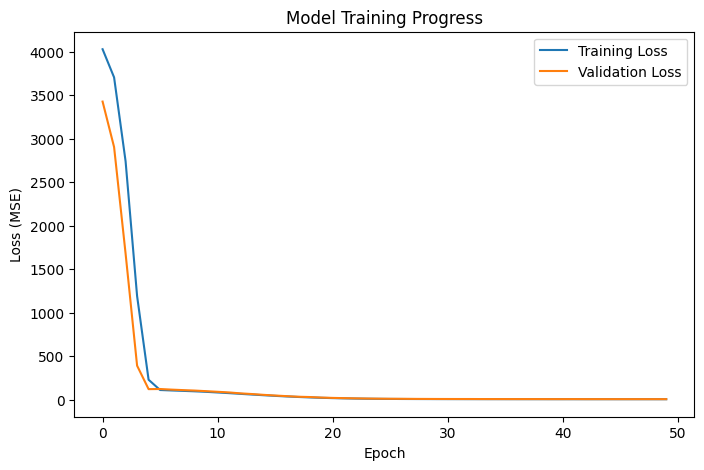

In [10]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Model Training Progress')
plt.legend()
plt.show()

## Step 11: Plot Predicted vs Actual

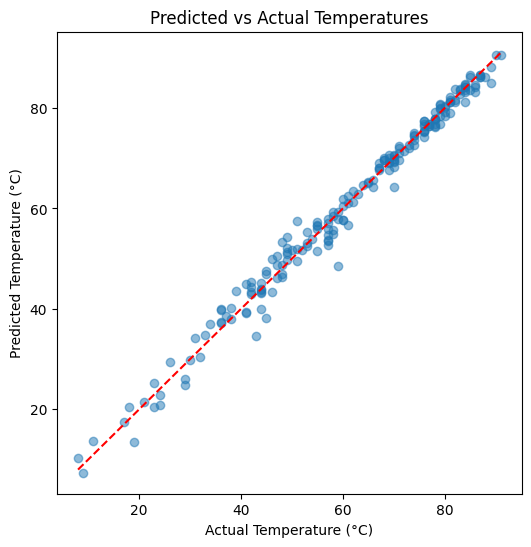

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Predicted vs Actual Temperatures")
plt.show()

## Step 12: Make Predictions

In [27]:
predictions = model.predict(X_test)

# Flatten predictions to 1D array
predictions_flat = predictions.flatten()

# Create a DataFrame
results_df = pd.DataFrame({
    "Predicted": predictions_flat,
    "Actual": y_test
})

# Show first 10 rows
print(results_df.head(10))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
   Predicted  Actual
0  81.650505    81.0
1  68.081856    67.0
2  43.808083    44.0
3  64.721336    64.0
4  39.433689    41.0
5  86.580711    87.0
6  52.180664    49.0
7  69.202629    70.0
8  55.281693    53.0
9  79.919334    79.0


## Step 13: Save the Model

In [13]:
model.save('stlouis_temperature_predictor.keras')
print("Model saved as 'stlouis_temperature_predictor.keras'")

Model saved as 'stlouis_temperature_predictor.keras'
